# Tutorial: GraphAnalysis

The _GraphAnalysis_ class is used to analyse graph data.

Author: Andreas Lüschow

Last updated: 2021/07/28

-----

## Import

Import the appropriate class from __Bibliometa__:

In [1]:
from bibliometa.graph.analysis import GraphAnalysis

As you can see from the following output, the _CSV2JSON_ class has a lot of built-in functions:

In [2]:
dir(GraphAnalysis)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_avg_degree',
 '_avg_shortest_path',
 '_clique_number',
 '_component_count',
 '_degree_centrality',
 '_degree_distribution',
 '_density',
 '_diameter',
 '_edge_count',
 '_global_cluster_coefficient',
 '_local_cluster_coefficient',
 '_max_component',
 '_node_count',
 '_nr_of_cliques',
 '_top_dc_nodes',
 '_update_config',
 'get_config',
 'set_config',
 'start']

We are only interested in the public methods, so let's have a look at them:

In [3]:
[m for m in dir(GraphAnalysis) if not m.startswith('_')]

['get_config', 'set_config', 'start']

The usage of _GraphAnalysis_ class is quite simple: There are two methods to work with the class configuration, and only one method to actually start the conversion process.

If you need to get familiar with setting or getting configuration from a _GraphAnalysis_ object, read the tutorials about _CSV2JSON_ or _JSON2EdgeList_. Handling configuration parameters is explained in detail there.

-----

## Starting the graph analysis

First of all, we need to create a GraphAnalysis object and set some configuration parameters:

In [4]:
ga = GraphAnalysis()
ga.get_config()

('i', None)
('o', None)
('img', None)
('create_graphml', False)
('graphml', None)
('n', None)
('e', None)
('sim', None)
('sim_functions', [])
('weighted', False)
('t', 0)
('reload', True)
('name', '')
('chunksize', 1000000)
('csv_sep', '\t')
('log', None)
('log_level_std', 'INFO')
('log_level_file', 'DEBUG')
('verbose', False)
('encoding', 'utf-8')
('config_id', 'None_None_None_0')

As you can see, some of the configuration parameters are undefined. That's why we need to set them in advance:

In [5]:
ga.config.i = "../data/examples/similarity.tar.gz"
ga.config.o = "../data/output/graph_analysis/demo.txt"
ga.config.img = "../data/output/img/"
ga.config.n = "cities"
ga.config.e = "similarity"
ga.config.sim = "mint_1"
ga.config.sim_functions = ["mint_1", "jacc", "ovlp"]
ga.config.weighted = True
ga.config.t = 0  # threshold
ga.config.log = "../data/logs/graphanalysis.out"
ga.get_config()

('i', '../data/examples/similarity.tar.gz')
('o', '../data/output/graph_analysis/demo.txt')
('img', '../data/output/img/')
('create_graphml', False)
('graphml', None)
('n', 'cities')
('e', 'similarity')
('sim', 'mint_1')
('sim_functions', ['mint_1', 'jacc', 'ovlp'])
('weighted', True)
('t', 0)
('reload', True)
('name', '')
('chunksize', 1000000)
('csv_sep', '\t')
('log', '../data/logs/graphanalysis.out')
('log_level_std', 'INFO')
('log_level_file', 'DEBUG')
('verbose', False)
('encoding', 'utf-8')
('config_id', 'cities_similarity_mint_1_0')

__i__ (str): Input similarity file
* If configuration parameter _reload_ is set to True (which it is by default, for other use cases see further below in this tutorial), the content from this similarity file will be used to create a graph.

__o__ (str): Output graph analysis file
* Path to the output text file where information from graph analysis will be stored.

__img__ (str): Location of output images
* Path to folder where output images will be stored.

__n__ (str): Name of nodes
* Should be a short string since it is used to uniquely identify a graph analysis run (see _config_id_ below).

__e__ (str): Name of edges
* Should also be a short string since it is used to uniquely identify a graph analysis run (see _config_id_ below).

__sim__ (str): Name of similarity function used
* Similarity function that is read from the similarity file. Is also used in uniquely identifying a graph analysis run (see _config_id_ below).

__sim_functions__ (list): List of similarity functions
* A list of similarity functions in the same order as they appear in the input similarity file. This list is used to identify the appropriate column in the input data where the similarity function defined in parameter _sim_ can be found. 

__weighted__ (bool): If the similarity function creates weighted edges
* Some graph analysis algorithms work differently on weighted/non-weighted edges.

__t__ (int): Threshold of similarity function
* This parameter defines whether only a subset of the edges found in the similarity file will be considered for graph creation, i.e., if only edges with a weight > t will be added to the graph.

__csv_sep__ (str): CSV separator
* CSV separator used in input similarity file

__chunksize__ (int): Chunk size for large input files
* If the input similarity file contains a lot of rows, it will be read in chunks. This parameter defines the size of a single chunk.

Based on the information from parameters _n_, _e_, _sim_, and _t_, a configuration ID will be created automatically to identify a single configuration throughout program execution. This ID is added to the configuration and can thus be retrieved at any time from a GraphAnalysis object:

In [6]:
ga.get_config("config_id")

('config_id', 'cities_similarity_mint_1_0')

Now we can start the graph analysis:

In [7]:
ga.start()

  0%|          | 0/9 [00:00<?, ?it/s]

Since the configuration parameter _verbose_ is set to False (the default behaviour), no output was created on screen. However, the output files were created as we can check with a quick look into the appropriate files:

In [8]:
# log file
with open(ga.config.log, "r", encoding=ga.config.encoding) as f:
    log_text = f.read().splitlines()

log_text

['2021-07-28T15:46:54.379525+0200 INFO Create graph from information in file ../data/examples/similarity.tar.gz.',
 '2021-07-28T15:46:54.392340+0200 INFO Import datasets ...',
 '2021-07-28T15:46:54.395444+0200 INFO Import finished!',
 '2021-07-28T15:46:54.405275+0200 INFO Graph creation finished.',
 '2021-07-28T15:46:54.405423+0200 INFO Start graph analysis for configuration cities_similarity_mint_1_0.',
 '2021-07-28T15:46:54.572205+0200 INFO Nodes: 308',
 '2021-07-28T15:46:54.573289+0200 INFO Edges: 330',
 '2021-07-28T15:46:54.573901+0200 INFO Components: 66',
 '2021-07-28T15:46:54.574004+0200 INFO Size of largest component: 146',
 '2021-07-28T15:46:54.574066+0200 INFO Average Degree: 1.0714285714285714',
 '2021-07-28T15:46:54.585602+0200 INFO Start plotting degree distributions.',
 '2021-07-28T15:46:56.546939+0200 INFO Finished plotting degree distributions.',
 '2021-07-28T15:46:56.547095+0200 INFO Getting top Degree Centrality nodes.',
 '2021-07-28T15:46:56.547565+0200 INFO Top 0 De

In [9]:
# output text file
with open(ga.config.o, "r", encoding=ga.config.encoding) as f:
    o_text = f.read().splitlines()

o_text

['Nodes: 308',
 'Edges: 330',
 'Components: 66',
 'Size of largest component: 146',
 'Average Degree: 1.0714285714285714',
 "Top degree centrality nodes: [(19, 'Leipzig'), (17, 'Erfurt'), (17, 'Wittenberg'), (11, 'Jena'), (11, 'Halle')]",
 'Average degree centrality: 0.025249999999999998',
 'Minimum degree centrality: 0.0033',
 'Maximum degree centrality: 0.0619',
 'Stdev degree centrality: 0.017700258943491948',
 'Average local cluster coefficient: 0.12088235294117645',
 'Minimum local cluster coefficient: 0.0',
 'Maximum local cluster coefficient: 0.3775',
 'Stdev local cluster coefficient: 0.10811653427066076',
 'Density: 0.006979990693345742',
 'Diameter: 11',
 'Average shortest path: 5.20207841284837',
 'Global clustering coefficient: 0.3010153213090369',
 'Graph clique number: 5',
 'Number of cliques: 200']

In [10]:
# output image files
import os 

os.listdir(ga.config.img)

['cities_similarity_mint_1_0_degree_histogram.png',
 'cities_similarity_mint_1_0_degree_distribution.png',
 'cities_similarity_mint_1_0_degree_density.png',
 'cities_similarity_mint_1_0_degree_distribution_log-log.png',
 'cities_similarity_mint_1_0_degree_centrality.png',
 'cities_similarity_mint_1_0_local_cluster_coefficient.png']

-----

## GraphML files

If you want the script to read graph information from a similarity file and create a GraphML file afterwards, use the _create_graphml_ parameter in the configuration:

__create_graphml__ (bool): If a GraphML representation will be created
* If set to True, the graph created from a similarity file will be written to a GraphML file. (Does only take effect if configuration parameter _reload_ is set to True, see below).

__graphml__ (str): Output GraphML file
* Path to GraphML file that will be stored after reading a graph from a similarity file. Is only used if _create_ == True.

Saving your graph in GraphML format has some advantages compared to a similarity list. First of all, you can use your data in other applications that support GraphML (e.g., Gephi). But reading a graph from a GraphML is also considerably faster than loading it each time from a similarity file row by row. This is especially true for large files.

In [12]:
ga.config.create_graphml = True
ga.config.graphml = "../data/output/graphml/demo.graphml"

In [13]:
ga.start()

  0%|          | 0/9 [00:00<?, ?it/s]

Now let's see what these parameters created:

In [14]:
# check if GraphML file is there
os.listdir(os.path.dirname(ga.config.graphml))

['demo.graphml']

In [15]:
# read beginning of GraphML file as text
with open(ga.config.graphml, "r", encoding=ga.config.encoding) as f:
    graphml = f.read()
    
graphml[:1000]

'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">\n  <key id="d0" for="edge" attr.name="weight" attr.type="double" />\n  <graph edgedefault="undirected">\n    <node id="Mühlhausen" />\n    <node id="Königsberg" />\n    <node id="Danzig" />\n    <node id="Northeim" />\n    <node id="Erfurt" />\n    <node id="London" />\n    <node id="Dieppe" />\n    <node id="Amsterdam" />\n    <node id="Berlin" />\n    <node id="Charenton-le-Pont (Charenton)" />\n    <node id="Plan" />\n    <node id="Thumsenreuth" />\n    <node id="Arnstadt" />\n    <node id="Naumburg" />\n    <node id="Jena" />\n    <node id="Feucht" />\n    <node id="Röthenbach" />\n    <node id="Altdorf" />\n    <node id="Prag" />\n    <node id="Olmütz" />\n    <node id="Garsten" />\n    <node id="Salzburg" />\n    <no

If a GraphML file for a specific configuration is already available, you can change the default configuration for parameter _reload_ to False. By this, the similarity file will not be used to create a graph but the GraphML file will be loaded instead.

We can see this behaviour by asking for verbose output. Have a closer look at the first few log messages:

2021-07-28 15:49:11.707 | INFO     | bibliometa.graph.utils:load_graph:49 - Import from .graphml file ../data/output/graphml/demo.graphml.
2021-07-28 15:49:11.757 | INFO     | bibliometa.graph.utils:load_graph:51 - Import finished.
2021-07-28 15:49:11.760 | INFO     | bibliometa.graph.analysis:start:82 - Start graph analysis for configuration cities_similarity_mint_1_0.


  0%|          | 0/9 [00:00<?, ?it/s]

2021-07-28 15:49:11.935 | INFO     | bibliometa.graph.analysis:start:99 - Nodes: 308
2021-07-28 15:49:11.942 | INFO     | bibliometa.graph.analysis:start:102 - Edges: 330
2021-07-28 15:49:11.943 | INFO     | bibliometa.graph.analysis:start:105 - Components: 66
2021-07-28 15:49:11.946 | INFO     | bibliometa.graph.analysis:start:108 - Size of largest component: 146
2021-07-28 15:49:11.947 | INFO     | bibliometa.graph.analysis:start:111 - Average Degree: 1.0714285714285714
2021-07-28 15:49:11.958 | INFO     | bibliometa.graph.analysis:start:117 - Start plotting degree distributions.


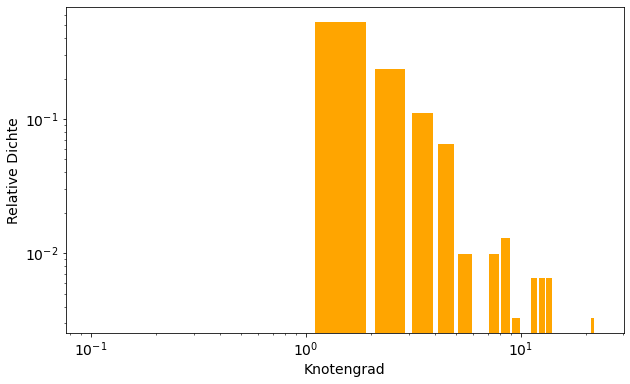

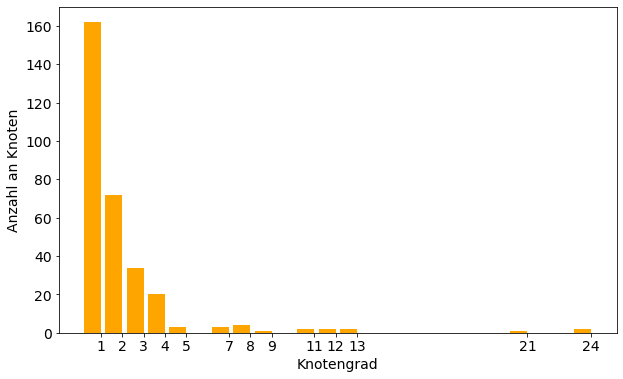

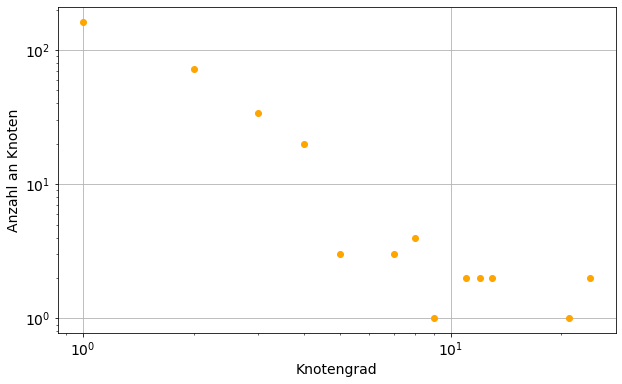

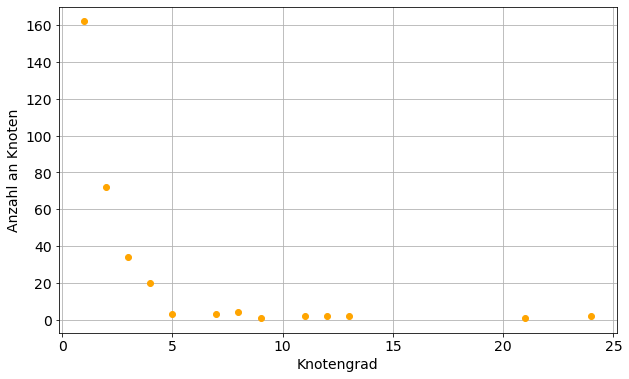

2021-07-28 15:49:14.444 | INFO     | bibliometa.graph.analysis:start:119 - Finished plotting degree distributions.
2021-07-28 15:49:14.456 | INFO     | bibliometa.graph.analysis:start:122 - Getting top Degree Centrality nodes.
2021-07-28 15:49:14.459 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 0 Degree Centrality node: 19, Leipzig
2021-07-28 15:49:14.465 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 1 Degree Centrality node: 17, Erfurt
2021-07-28 15:49:14.470 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 2 Degree Centrality node: 17, Wittenberg
2021-07-28 15:49:14.471 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 3 Degree Centrality node: 11, Jena
2021-07-28 15:49:14.472 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 4 Degree Centrality node: 11, Halle
2021-07-28 15:49:14.474 | INFO     | bibliometa.graph.analysis:start:125 - Calculating Degree Centrality distributions.


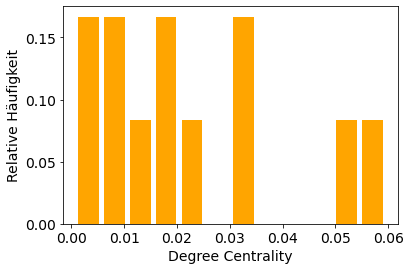

2021-07-28 15:49:14.794 | INFO     | bibliometa.graph.analysis:start:129 - Average degree centrality: 0.025249999999999998
2021-07-28 15:49:14.797 | INFO     | bibliometa.graph.analysis:start:132 - Minimum degree centrality: 0.0033
2021-07-28 15:49:14.800 | INFO     | bibliometa.graph.analysis:start:135 - Maximum degree centrality: 0.0619
2021-07-28 15:49:14.805 | INFO     | bibliometa.graph.analysis:start:138 - Stdev degree centrality: 0.017700258943491948
2021-07-28 15:49:14.821 | INFO     | bibliometa.graph.analysis:start:144 - Calculating local cluster coefficients.


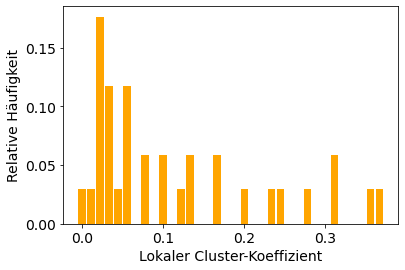

2021-07-28 15:49:15.208 | INFO     | bibliometa.graph.analysis:start:151 - Average local cluster coefficient: 0.12088235294117645
2021-07-28 15:49:15.218 | INFO     | bibliometa.graph.analysis:start:154 - Minimum local cluster coefficient: 0.0
2021-07-28 15:49:15.222 | INFO     | bibliometa.graph.analysis:start:157 - Maximum local cluster coefficient: 0.3775
2021-07-28 15:49:15.224 | INFO     | bibliometa.graph.analysis:start:160 - Stdev local cluster coefficient: 0.10811653427066076
2021-07-28 15:49:15.249 | INFO     | bibliometa.graph.analysis:start:168 - Density: 0.006979990693345742
2021-07-28 15:49:15.651 | INFO     | bibliometa.graph.analysis:start:176 - Diameter: 11
2021-07-28 15:49:16.289 | INFO     | bibliometa.graph.analysis:start:184 - Average shortest path: 5.20207841284837
2021-07-28 15:49:16.344 | INFO     | bibliometa.graph.analysis:start:192 - Global clustering coefficient: 0.3010153213090369
2021-07-28 15:49:16.367 | INFO     | bibliometa.graph.analysis:start:200 - Gra

In [16]:
ga.config.verbose = True
ga.config.reload = False
ga.start()

And now compare to the log messages if _reload_ is set to True:

2021-07-28 15:49:22.334 | INFO     | bibliometa.graph.utils:load_graph:56 - Create graph from information in file ../data/examples/similarity.tar.gz.
2021-07-28 15:49:22.342 | INFO     | bibliometa.graph.utils:read_file:81 - Import datasets ...
2021-07-28 15:49:22.357 | INFO     | bibliometa.graph.utils:read_file:90 - Import finished!
2021-07-28 15:49:22.362 | INFO     | bibliometa.graph.utils:read_file:105 - Saving graph as .graphml file ...
2021-07-28 15:49:22.412 | INFO     | bibliometa.graph.utils:read_file:107 - Saved .graphml file successfully.
2021-07-28 15:49:22.416 | INFO     | bibliometa.graph.utils:load_graph:58 - Graph creation finished.
2021-07-28 15:49:22.418 | INFO     | bibliometa.graph.analysis:start:82 - Start graph analysis for configuration cities_similarity_mint_1_0.


  0%|          | 0/9 [00:00<?, ?it/s]

2021-07-28 15:49:22.659 | INFO     | bibliometa.graph.analysis:start:99 - Nodes: 308
2021-07-28 15:49:22.666 | INFO     | bibliometa.graph.analysis:start:102 - Edges: 330
2021-07-28 15:49:22.666 | INFO     | bibliometa.graph.analysis:start:105 - Components: 66
2021-07-28 15:49:22.672 | INFO     | bibliometa.graph.analysis:start:108 - Size of largest component: 146
2021-07-28 15:49:22.677 | INFO     | bibliometa.graph.analysis:start:111 - Average Degree: 1.0714285714285714
2021-07-28 15:49:22.687 | INFO     | bibliometa.graph.analysis:start:117 - Start plotting degree distributions.


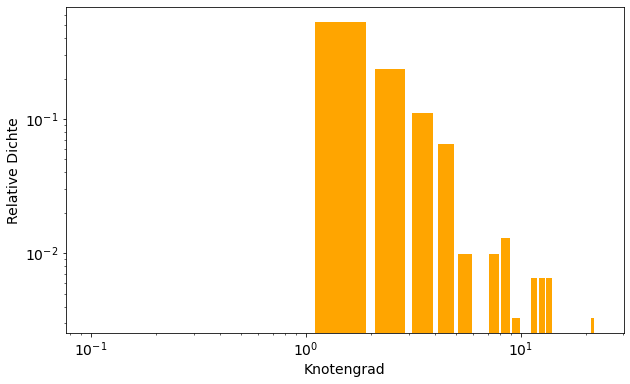

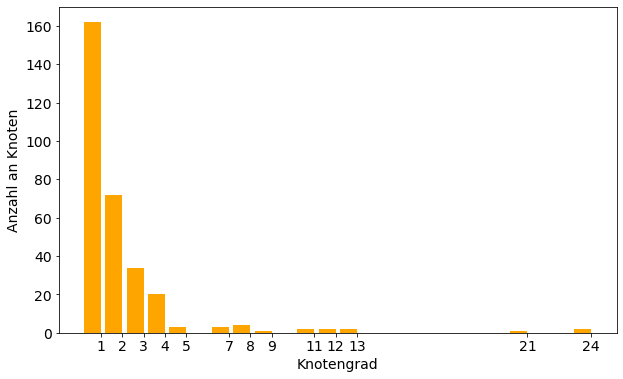

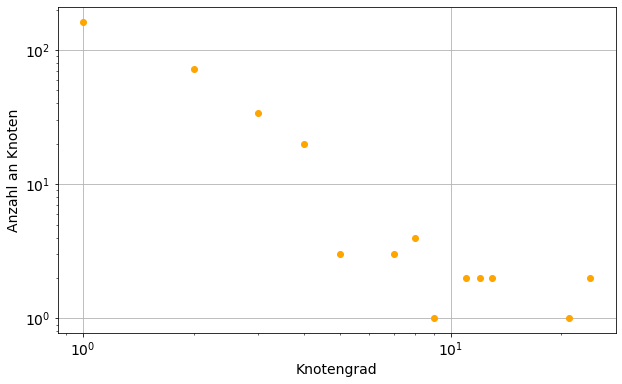

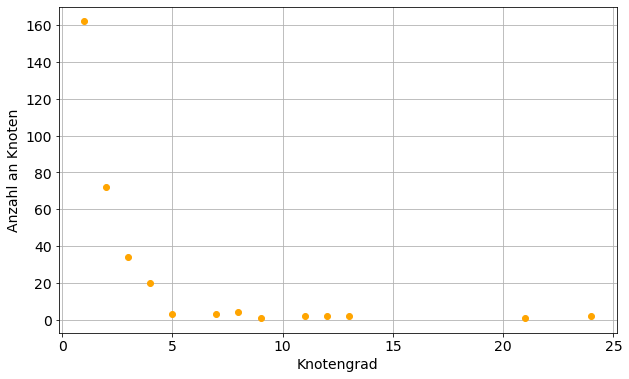

2021-07-28 15:49:25.194 | INFO     | bibliometa.graph.analysis:start:119 - Finished plotting degree distributions.
2021-07-28 15:49:25.205 | INFO     | bibliometa.graph.analysis:start:122 - Getting top Degree Centrality nodes.
2021-07-28 15:49:25.210 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 0 Degree Centrality node: 19, Leipzig
2021-07-28 15:49:25.213 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 1 Degree Centrality node: 17, Erfurt
2021-07-28 15:49:25.216 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 2 Degree Centrality node: 17, Wittenberg
2021-07-28 15:49:25.218 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 3 Degree Centrality node: 11, Jena
2021-07-28 15:49:25.219 | INFO     | bibliometa.graph.analysis:_top_dc_nodes:357 - Top 4 Degree Centrality node: 11, Halle
2021-07-28 15:49:25.227 | INFO     | bibliometa.graph.analysis:start:125 - Calculating Degree Centrality distributions.


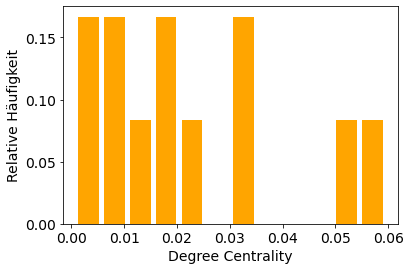

2021-07-28 15:49:25.508 | INFO     | bibliometa.graph.analysis:start:129 - Average degree centrality: 0.025249999999999998
2021-07-28 15:49:25.511 | INFO     | bibliometa.graph.analysis:start:132 - Minimum degree centrality: 0.0033
2021-07-28 15:49:25.520 | INFO     | bibliometa.graph.analysis:start:135 - Maximum degree centrality: 0.0619
2021-07-28 15:49:25.524 | INFO     | bibliometa.graph.analysis:start:138 - Stdev degree centrality: 0.017700258943491948
2021-07-28 15:49:25.534 | INFO     | bibliometa.graph.analysis:start:144 - Calculating local cluster coefficients.


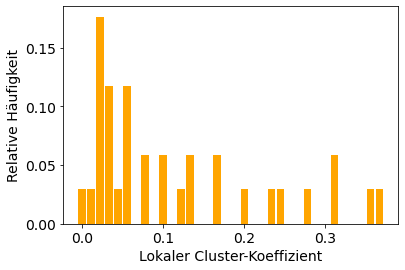

2021-07-28 15:49:25.864 | INFO     | bibliometa.graph.analysis:start:151 - Average local cluster coefficient: 0.12088235294117645
2021-07-28 15:49:25.869 | INFO     | bibliometa.graph.analysis:start:154 - Minimum local cluster coefficient: 0.0
2021-07-28 15:49:25.872 | INFO     | bibliometa.graph.analysis:start:157 - Maximum local cluster coefficient: 0.3775
2021-07-28 15:49:25.879 | INFO     | bibliometa.graph.analysis:start:160 - Stdev local cluster coefficient: 0.10811653427066076
2021-07-28 15:49:25.905 | INFO     | bibliometa.graph.analysis:start:168 - Density: 0.006979990693345742
2021-07-28 15:49:26.147 | INFO     | bibliometa.graph.analysis:start:176 - Diameter: 11
2021-07-28 15:49:26.573 | INFO     | bibliometa.graph.analysis:start:184 - Average shortest path: 5.20207841284837
2021-07-28 15:49:26.609 | INFO     | bibliometa.graph.analysis:start:192 - Global clustering coefficient: 0.3010153213090369
2021-07-28 15:49:26.633 | INFO     | bibliometa.graph.analysis:start:200 - Gra

In [17]:
ga.config.reload = True
ga.start()

-----

## Logging, encoding, verbose

There are only a couple of configuration parameters left, let's have a look at them.

In [18]:
ga.get_config()

('i', '../data/examples/similarity.tar.gz')
('o', '../data/output/graph_analysis/demo.txt')
('img', '../data/output/img/')
('create_graphml', True)
('graphml', '../data/output/graphml/demo.graphml')
('n', 'cities')
('e', 'similarity')
('sim', 'mint_1')
('sim_functions', ['mint_1', 'jacc', 'ovlp'])
('weighted', True)
('t', 0)
('reload', True)
('name', '')
('chunksize', 1000000)
('csv_sep', '\t')
('log', '../data/logs/graphanalysis.out')
('log_level_std', 'INFO')
('log_level_file', 'DEBUG')
('verbose', True)
('encoding', 'utf-8')
('config_id', 'cities_similarity_mint_1_0')

__log__ (str): Path to log file
* The conversion process and its errors are documented in a log file. If _verbose_ == True (see below), the logging information is also shown on standard output if its level is _log_level_std_ or above.

__log_level_std__ (str): Logging level considered for standard output
* Only log messages with this level (or above) are shown on the standard output. This parameter has no effect if _verbose_ == False. Possible severity levels can be found in the documentation of the logging package `loguru`: https://loguru.readthedocs.io/en/stable/api/logger.html

__log_level_file__ (str): Logging level considered for log file
* Only log messages with this level (or above) are shown in the log file.

__verbose__ (bool): Show detailed information on standard output
* Whether logging information is not only written to the log file but also shown on the standard output.

__encoding__ (str): File encoding
* File encoding of input and output files. The default value is "utf-8" and there is usually no need to change this.

-----

## Iterating over multiple files

We can iterate over a list of files to conduct graph analysis on all of them. Just make sure that the input, output, graphml (and log) files are named differently in each iteration.

To ensure that each iteration gets its own configuration ID, you have to add the _name_ configuration parameter.

__name__ (str): Unique identifier for each run in a loop
* If the graph analysis is conducted on more than one file in a loop, you somehow have to make sure that for each file a separate output, graphml, and log file is created. The content of the _name_ parameter will be appended to all file names and thus helps to identify multiple files created with the same configuration.

In [19]:
ga = GraphAnalysis()

# iterate over .tar.gz archives in folder
for root, dirs, files in os.walk(os.path.dirname("../data/examples/multiple_tar/")):
    for file in files:
        filename = os.path.splitext(file)[0]
        ga.set_config(i=root + os.sep + file,
                      name=filename.split(".")[0],
                      o=f"../data/output/graph_analysis/graphanalysis.txt",
                      img="../data/output/img/",
                      create_graphml=True,
                      graphml=f"../data/output/graphml/{filename}.graphml",
                      n="cities",
                      e="similarity",
                      sim="mint_1",
                      sim_functions=["mint_1", "jacc", "ovlp"],
                      weighted=True,
                      t=0,
                      reload=True,
                      log=f"../data/logs/graphanalysis_{filename}.out"
                     ).start()

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

-----